<a href="https://colab.research.google.com/github/arshad831/EssesntiialSQL/blob/main/Linear_Models-bhushan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



In [ ]:
sklearn.__all__

['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

# Linear Regression Example

In [ ]:
# Data set is available at https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
car_mpg = pd.read_csv("https://raw.githubusercontent.com/arshad831/machinelearning/main/auto-mpg.csv",
                     header=None)

In [3]:
car_mpg.shape

(398, 9)

In [4]:
car_mpg.head()
#398

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [5]:
col_names = ["mpg","cylinders",
             "displacement",
             "horsepower",
             "weight",
             "acceleration",
             "model_year",
             "origin",
             "car_name"]    

In [6]:
car_mpg.columns = col_names
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [7]:
car_mpg['car_name'].nunique()
#305

305

In [8]:
car_mpg.groupby(car_mpg['origin']).mean()

,mpg,cylinders,displacement,weight,acceleration,model_year
origin,,,,,,
1,20.083534,6.248996,245.901606,3361.931727,15.033735,75.610442
2,27.891429,4.157143,109.142857,2423.300000,16.787143,75.814286
3,30.450633,4.101266,102.708861,2221.227848,16.172152,77.443038


In [9]:
car_names = car_mpg['car_name'].tolist()
car_mpg['type'] = [1 if 'diesel' in element else 2 for element in car_names]
#car_names

In [10]:
#car_mpg.pop('car_name')
print(car_mpg ['type'].value_counts())

2    391
1      7
Name: type, dtype: int64


In [11]:
car_mpg.loc[car_mpg['type'] == 1]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,type
244,43.1,4,90.0,48,1985,21.5,78,2,"""volkswagen rabbit custom diesel""",1
325,44.3,4,90.0,48,2085,21.7,80,2,"""vw rabbit c (diesel)""",1
326,43.4,4,90.0,48,2335,23.7,80,2,"""vw dasher (diesel)""",1
327,36.4,5,121.0,67,2950,19.9,80,2,"""audi 5000s (diesel)""",1
359,28.1,4,141.0,80,3230,20.4,81,2,"""peugeot 505s turbo diesel""",1
360,30.7,6,145.0,76,3160,19.6,81,2,"""volvo diesel""",1
387,38.0,6,262.0,85,3015,17.0,82,1,"""oldsmobile cutlass ciera (diesel)""",1


In [ ]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(car_mpg)))

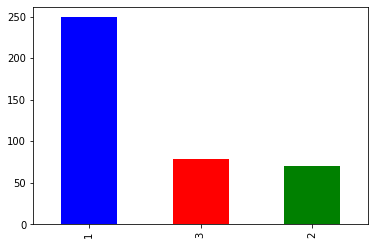

In [ ]:
pd.value_counts(car_mpg['origin']).plot.bar(color= my_colors)

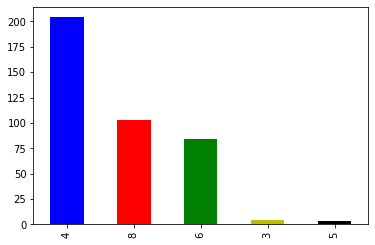

In [ ]:
pd.value_counts(car_mpg['cylinders']).plot.bar(color= my_colors)

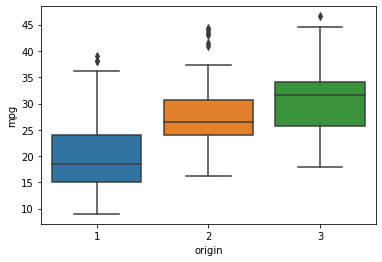

In [ ]:
sns.boxplot(x = 'origin', y = 'mpg', data = car_mpg)

In [ ]:
car_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,1.982412
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.131614
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,2.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,2.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,2.000000


In [25]:
#Lets drop the car column
car_mpg.drop(columns=['car_name'],inplace=True)

In [ ]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
0,18.0,8,307.0,130,3504,12.0,70,1,2
1,15.0,8,350.0,165,3693,11.5,70,1,2
2,18.0,8,318.0,150,3436,11.0,70,1,2
3,16.0,8,304.0,150,3433,12.0,70,1,2
4,17.0,8,302.0,140,3449,10.5,70,1,2


In [ ]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
type              int64
dtype: object

In [12]:
car_mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
car_mpg.loc[car_mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,type
32,25.0,4,98.0,?,2046,19.0,71,1,"""ford pinto""",2
126,21.0,6,200.0,?,2875,17.0,74,1,"""ford maverick""",2
330,40.9,4,85.0,?,1835,17.3,80,2,"""renault lecar deluxe""",2
336,23.6,4,140.0,?,2905,14.3,80,1,"""ford mustang cobra""",2
354,34.5,4,100.0,?,2320,15.8,81,2,"""renault 18i""",2
374,23.0,4,151.0,?,3035,20.5,82,1,"""amc concord dl""",2


In [14]:
list(car_mpg.loc[car_mpg['horsepower'] == '?'].index)

[32, 126, 330, 336, 354, 374]

In [15]:
car_mpg.drop(list(car_mpg.loc[car_mpg['horsepower'] == '?'].index),inplace=True)

In [17]:
car_mpg.shape

(392, 10)

In [20]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
type              int64
dtype: object

In [19]:
car_mpg['horsepower'] = car_mpg['horsepower'].astype(int)

In [ ]:
car_mpg['horsepower'] = car_mpg['horsepower'].apply(lambda x : int(x))

In [ ]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
type              int64
dtype: object

In [21]:
car_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
type            0
dtype: int64

In [ ]:
car_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,1.982143
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.132601
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,2.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,2.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,2.000000


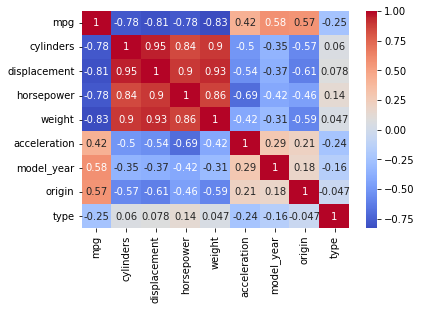

In [22]:
sns.heatmap(car_mpg.corr(),
            annot=True,
            yticklabels=True,
            cmap='coolwarm')

In [26]:
# Divide the dataset in features & target variable
#Divide the dataset in independent variables & dependent variable

X = car_mpg.drop(columns=['mpg'])
y = car_mpg['mpg']

In [27]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
0,8,307.0,130,3504,12.0,70,1,2
1,8,350.0,165,3693,11.5,70,1,2
2,8,318.0,150,3436,11.0,70,1,2
3,8,304.0,150,3433,12.0,70,1,2
4,8,302.0,140,3449,10.5,70,1,2


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
#Divide the dataset in Train & Test split
#total 100 records 20 records will go in TEST & TRAIN will have 80 total 100%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 51 to 248
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     294 non-null    int64  
 1   displacement  294 non-null    float64
 2   horsepower    294 non-null    int64  
 3   weight        294 non-null    int64  
 4   acceleration  294 non-null    float64
 5   model_year    294 non-null    int64  
 6   origin        294 non-null    int64  
 7   type          294 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 20.7 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 45 to 298
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     98 non-null     int64  
 1   displacement  98 non-null     float64
 2   horsepower    98 non-null     int64  
 3   weight        98 non-null     int64  
 4   acceleration  98 non-null     float64
 5   model_year    98 non-null     int64  
 6   origin        98 non-null     int64  
 7   type          98 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 6.9 KB


In [ ]:
#check train split
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
51,4,79.0,70,2074,19.5,71,2,2
172,4,90.0,71,2223,16.5,75,2,2
4,8,302.0,140,3449,10.5,70,1,2
322,4,86.0,65,2110,17.9,80,3,2
127,6,232.0,100,2901,16.0,74,1,2


In [ ]:
#Target variable
y_train.head()

51     30.0
172    25.0
4      17.0
322    46.6
127    19.0
Name: mpg, dtype: float64

In [ ]:
#Check test data
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
45,6,258.0,110,2962,13.5,71,1,2
340,4,156.0,92,2620,14.4,81,1,2
301,4,105.0,70,2200,13.2,79,1,2
112,4,122.0,85,2310,18.5,73,1,2
391,4,135.0,84,2370,13.0,82,1,2


In [ ]:
y_test.head()

45     18.0
340    25.8
301    34.2
112    19.0
391    36.0
Name: mpg, dtype: float64

In [ ]:
# Define model
regression_model = LinearRegression(fit_intercept=True)

In [ ]:
regression_model

LinearRegression()

In [ ]:
#Train the model
regression_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression_model.intercept_

6.697285232386214

In [ ]:
regression_model.coef_

array([-2.59947511e-01,  1.66230904e-02,  1.05075652e-03, -7.15925643e-03,
        2.11920558e-01,  8.08733763e-01,  1.20488734e+00])

In [ ]:
for idx,col_name in enumerate(X_train.columns):
    print("The Cofficients for {} is {}".format(col_name,regression_model.coef_[idx]))

The Cofficients for cylinders is -0.600759216295316
The Cofficients for displacement is 0.023999971121236124
The Cofficients for horsepower is -0.00845583283264991
The Cofficients for weight is -0.00728684506974806
The Cofficients for acceleration is 0.031063584460093933
The Cofficients for model_year is 0.7060144008652022
The Cofficients for origin is 1.3975076042331864
The Cofficients for type is -9.211900144229151


In [ ]:
regression_model.coef_

array([-2.59947511e-01,  1.66230904e-02,  1.05075652e-03, -7.15925643e-03,
        2.11920558e-01,  8.08733763e-01,  1.20488734e+00])

In [ ]:
regression_model

LinearRegression()

In [ ]:
# Predict the data
regression_model.predict(X_test)

In [ ]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
45,6,258.0,110,2962,13.5,71,1,2
340,4,156.0,92,2620,14.4,81,1,2
301,4,105.0,70,2200,13.2,79,1,2
112,4,122.0,85,2310,18.5,73,1,2
391,4,135.0,84,2370,13.0,82,1,2


In [ ]:
pred = regression_model.predict(X_test)

In [ ]:
pred

array([20.29103394, 28.77696256, 29.35016218, 24.75832183, 30.82484648,
       23.34681081, 17.00881188, 13.43422391, 26.69005235, 25.35406074,
       21.12678331, 27.12897429, 32.38394768, 20.35914543, 16.30748872,
       26.68675286, 35.7567868 , 34.41625471, 20.18794696, 29.77888579,
       31.35195577, 14.75757493, 25.79755854, 34.9516203 , 13.14464643,
       33.85579393, 17.86966234, 15.54349569, 13.85195104, 29.76731253,
       15.34427847, 30.21713085, 21.2146429 , 21.36515715, 24.57422883,
       32.22980729, 25.7473877 , 32.22312356, 28.42337693, 27.61613618,
       17.68964425, 16.0847787 , 10.96943498, 30.00642304, 25.54292604,
       28.06385386, 26.01399595, 30.18054265, 26.72702634, 16.42159519,
       27.83926722, 32.70263467, 19.35768354, 23.42235135, 11.58610099,
       20.50494651, 22.0025733 , 23.20158877, 15.50682015, 12.59898687,
       20.8532925 , 22.73330666, 27.40783545, 34.51719049, 16.93660964,
       25.22819137, 27.06531429,  6.03053834, 28.16331308, 25.61

In [ ]:
y_test.head()

45     18.0
340    25.8
301    34.2
112    19.0
391    36.0
Name: mpg, dtype: float64

In [ ]:
# Evalute the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_absolute_error(pred,y_test)

2.633113606607232

In [ ]:
print(len(pred))


98


In [ ]:
print(len(y_test))

98


In [ ]:
mean_squared_error(pred,y_test) #base_model

10.489251543310035

In [ ]:
r2_score(pred,y_test) * 100

78.29570646593763

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
car_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,1.982143
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.132601
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,2.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,2.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,2.000000


In [28]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,type
0,18.0,8,307.0,130,3504,12.0,70,1,2
1,15.0,8,350.0,165,3693,11.5,70,1,2
2,18.0,8,318.0,150,3436,11.0,70,1,2
3,16.0,8,304.0,150,3433,12.0,70,1,2
4,17.0,8,302.0,140,3449,10.5,70,1,2


In [31]:
scaler = StandardScaler()
scaler = MinMaxScaler()

In [32]:
scaler.fit(car_mpg.drop(columns=['mpg']))

StandardScaler()

In [33]:
scaled_features = scaler.transform(car_mpg.drop(columns=['mpg'],axis=1))

In [34]:
scaled_features

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.62531533,
        -0.71664105,  0.13483997],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.62531533,
        -0.71664105,  0.13483997],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.62531533,
        -0.71664105,  0.13483997],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ...,  1.63640964,
        -0.71664105,  0.13483997],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.63640964,
        -0.71664105,  0.13483997],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.63640964,
        -0.71664105,  0.13483997]])

In [ ]:
#Split the dataset
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(scaled_features,car_mpg['mpg'],test_size=0.30,random_state=100)

In [ ]:
y_train_t[:5]

171    24.0
267    27.5
392    27.0
243    21.5
251    20.2
Name: mpg, dtype: float64

In [ ]:
regression_model_sgd  = SGDRegressor(alpha=0.0005, #hyper-parameter tunning
                                     learning_rate='constant')

In [ ]:
regression_model_sgd

SGDRegressor(alpha=0.0005, learning_rate='constant')

In [ ]:
regression_model_sgd.fit(X_train_t,y_train_t)

SGDRegressor(alpha=0.0005, learning_rate='constant')

In [ ]:
sgd_pred = regression_model_sgd.predict(X_test_t)

In [ ]:
mean_squared_error(sgd_pred,y_test_t)

10.027280600029176

In [ ]:
r2_score(sgd_pred,y_test_t) * 100

78.50688185077097

In [ ]:
sgd_pred[:5]

array([20.40974826, 28.43549035, 31.21294109, 24.47204706, 25.82421912])

In [ ]:
y_test[:5]

45     18.0
340    25.8
301    34.2
112    19.0
391    36.0
Name: mpg, dtype: float64